<a href="https://colab.research.google.com/github/HanYang-AI/HYAI/blob/main/2_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data generation (Random Noise Data)

In [ ]:
import numpy as np

x = np.random.rand(100, 1)
y = 1 + 2 * x + .1 * np.random.randn(100, 1) # 선형적 상관 관계를 가진 데이터 생성.

# Plot Data

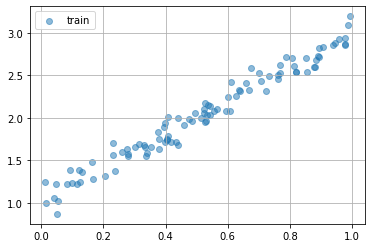

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()  
ax.scatter(x, y, color='C0', label='train', alpha=0.5)
ax.legend()
ax.grid(True)
fig.show()

# Random하게 W(기울기), b(절편) initializatoin
## y = Wx + b

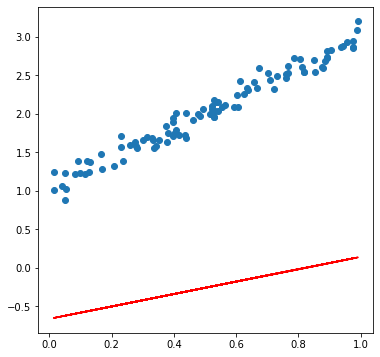

In [ ]:
fig = plt.figure(figsize=(6,6))

w = np.random.randn(1)
b = np.random.randn(1)

plt.scatter(x, y)
plt.plot(x,b+w*x,color='red')
plt.show()

# Linear Regression Implementation with numpy
## y = wx + b

In [ ]:
np.random.seed(42)
w = np.random.randn(1)
b = np.random.randn(1)

print('초기 랜덤한 기울기와 절편: ', w, b)

# 하이퍼 파라미터 설정
lr = 0.01
n_epochs = 3000
errer_loss = []


# 평균제곱오차, 경사하강법, 편미분 함수 구현
def mse(w, b, data):
    yhat = w * x + b
    error = (y - yhat)
    loss = (error ** 2).mean()
    return error, loss

def gradient_descent(lr, x, x_grad):
    result = x - lr * x_grad
    return result


def grad(error, data):
    w_grad = -2 * (x * error).mean()
    b_grad = -2 * error.mean()
    return w_grad, b_grad


# 학습 시작
for epoch in range(n_epochs):

    error, loss = mse(w, b, x)
    
    errer_loss.append(loss)

    w_grad, b_grad = grad(error, x)

    w = gradient_descent(lr, w, w_grad)
    b = gradient_descent(lr, b, b_grad)


print('학습 끝난 기울기와 절편: ', w, b)

초기 랜덤한 기울기와 절편:  [0.49671415] [-0.1382643]
학습 끝난 기울기와 절편:  [1.93135065] [1.04196865]


# 학습 완료 된 파라미터(W, b) 시각화

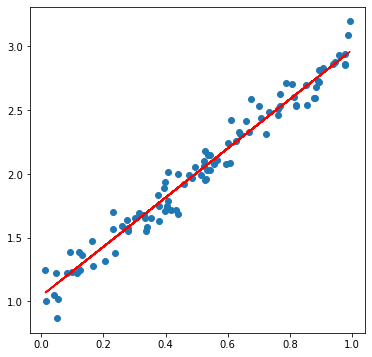

In [ ]:
fig = plt.figure(figsize=(6,6))

plt.scatter(x, y)
plt.plot(x,b+w*x,color='red')
plt.show()

# plot Loss (학습이 진행됨에 따른 Error 변화 시각화)

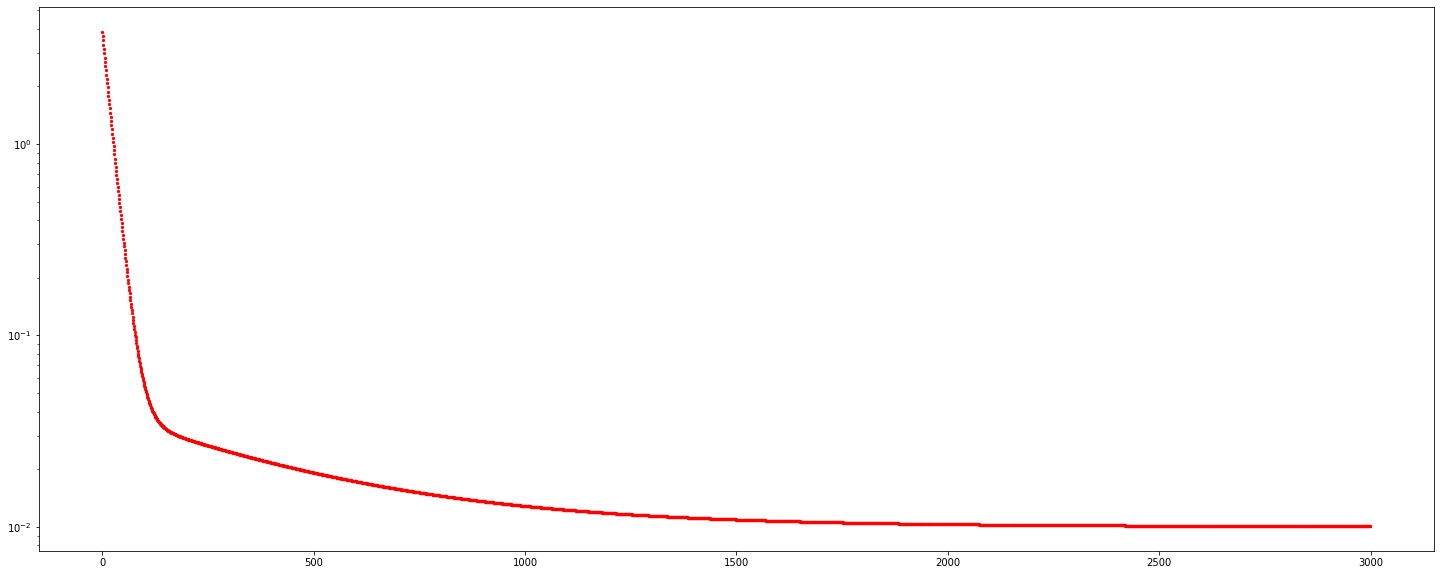

In [ ]:
plt.figure(figsize=(25,10))
plt.yscale('log')
plt.scatter([i for i in range (n_epochs)], errer_loss, s=5, c = 'r', label='loss')   

# Checking result
## (Sklearn Framework로 학습한 결과와, 우리가 밑바닥부터 구현한 것과 결과 비교)

In [ ]:
# Sanity Check: do we get the same results as our gradient descent?
from sklearn.linear_model import LinearRegression
linr = LinearRegression()
linr.fit(x, y)
print('Sklearn 기울기와 절편: ', linr.coef_[0], linr.intercept_)
print('직접 함수 구현 기울기 절편: ', w, b)

Sklearn 기울기와 절편:  [1.94913659] [1.03221213]
직접 함수 구현 기울기 절편:  [1.93135065] [1.04196865]


# Prediction

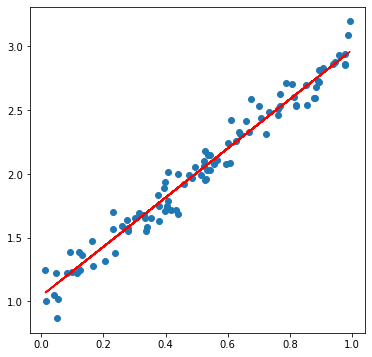

In [ ]:
fig = plt.figure(figsize=(6,6))

plt.scatter(x, y)
plt.plot(x,b+w*x,color='red')
plt.show()

# Model 예측

In [ ]:
def predict(x):
  return w * x + b

In [ ]:
predict(0.4)

array([1.81450891])